In [1]:
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from adasp_data_management import music
from torch.utils.data import DataLoader
import torch.nn as nn


import src.models as models
import src.spectrograms as spec
import src.utils as utils
import src.init as init

/home/ids/edabier/miniconda3/envs/amt-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch.multiprocessing as mp
mp.set_start_method('spawn', force=True)
if torch.cuda.is_available():
    dev = "cuda:0"
    torch.set_default_device(dev)
elif torch.backends.mps.is_available():
    dev = torch.device("mps")
    torch.set_default_device(dev)
else:
    print(f"cuda available: {torch.cuda.is_available()}")
    dev = "cpu"

In [3]:
n_iter=10
lr=1e-4
epochs=10
length=10
subset=0.05
split=0.8
batch=6
eps=1e-6

path = "/home/ids/edabier/AMT/Unrolled-NMF/MAPS/metadata.csv"
W_path = '/home/ids/edabier/AMT/Unrolled-NMF/test-data/synth-single-notes'
metadata = pd.read_csv(path)

train_data, test_data   = train_test_split(metadata, train_size=split, random_state=1)
train_data, valid_data  = train_test_split(train_data, train_size=split, random_state=1)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

train_set   = utils.LocalDataset(train_data, use_midi=True, fixed_length=length, subset=subset)
valid_set   = utils.LocalDataset(valid_data, use_midi=True, fixed_length=length, subset=subset)

train_sampler   = utils.SequentialBatchSampler(train_set, batch_size=batch)
collate_fn = utils.create_collate_fn(use_midi=True)
train_loader    = DataLoader(train_set, batch_sampler=train_sampler, collate_fn=collate_fn)

valid_sampler   = utils.SequentialBatchSampler(valid_set, batch_size=batch)
collate_fn = utils.create_collate_fn(use_midi=True)
valid_loader    = DataLoader(valid_set, batch_sampler=valid_sampler, collate_fn=collate_fn)

ralmu = models.RALMU(W_path=W_path, hidden=16, n_iter=n_iter, n_init_steps=10, shared=True, return_layers=False, aw_2d=False, clip_H=False)
ralmu = ralmu.to(dev)

optimizer = torch.optim.AdamW(ralmu.parameters(), lr=lr)
criterion = nn.MSELoss()
losses=[]

losses, valid_losses, W_hat, H_hat = utils.train(ralmu, train_loader, valid_loader, optimizer, criterion, dev, epochs, save_name="long_clip_10%")

0it [00:00, ?it/s]

8it [00:00, 23.73it/s]
/home/ids/edabier/AMT/Unrolled-NMF/src/utils.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata.loc[:,'segment_indices'] = self.compute_length()
2it [00:00, 18.54it/s]
/home/ids/edabier/AMT/Unrolled-NMF/src/utils.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata.loc[:,'segment_indices'] = self.compute_length()


current f_mes: [0.6341463414634146, 0.4782608695652174, 0.5000000000000001, 0.4090909090909091, 0.5238095238095238, 0.5671641791044776], torch.Size([6, 288, 88]), 6, torch.Size([6, 88, 1723]), 6, torch.Size([6, 88, 1723]), torch.Size([88, 1723]), 6


KeyboardInterrupt: 

0it [00:00, ?it/s]

8it [00:00, 25.17it/s]
/home/ids/edabier/AMT/Unrolled-NMF/src/utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metadata.loc[:,'segment_indices'] = self.compute_length()


Split the dataset - done ✓
Current loss= 4.916774272918701
Current loss= 7.133607864379883
Current loss= 10.851688385009766
Current loss= 7.785500526428223
Current loss= 10.734445571899414
Current loss= 9.31859302520752
Current loss= 11.829154014587402
Current loss= 6.423674583435059
Current loss= 8.327059745788574
Current loss= 7.230696678161621
Global loss= 8.455119466781616


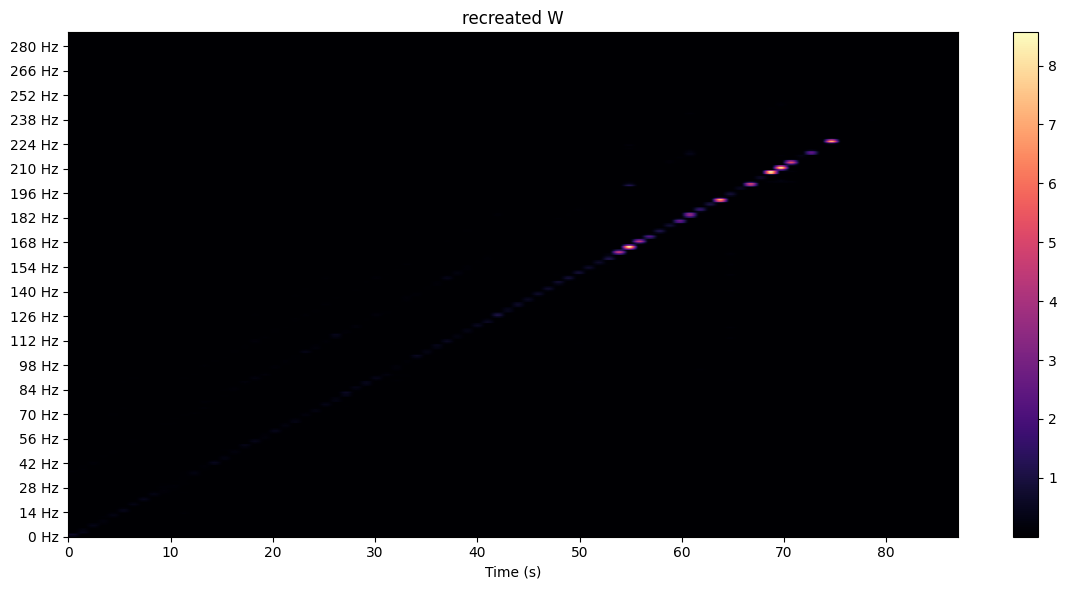

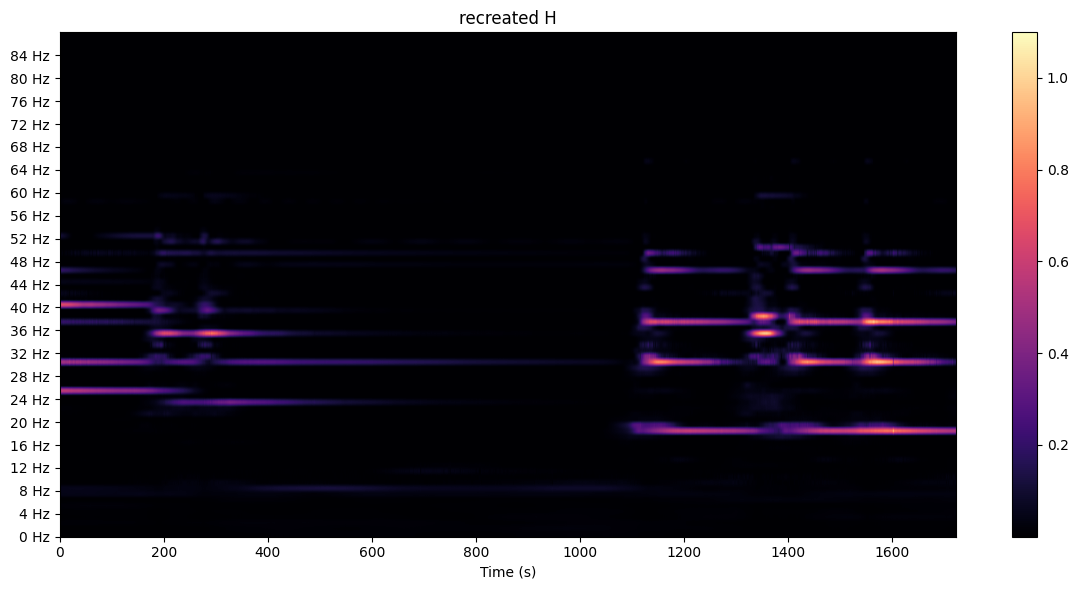

Current loss= 4.342875957489014


KeyboardInterrupt: 

In [6]:
# split=0.8
# length=10
# subset=0.05
# eps=1e-6

# epochs=2
# lr = 1e-3

n_iter=10
lr=1e-4
epochs=2
length=10
subset=0.05
split=0.8
batch=1
eps=1e-6

path = "/home/ids/edabier/AMT/Unrolled-NMF/MAPS/metadata.csv"
W_path = '/home/ids/edabier/AMT/Unrolled-NMF/test-data/synth-single-notes'
metadata = pd.read_csv(path)

train_data, test_data   = train_test_split(metadata, train_size=split, random_state=1)
train_data, valid_data  = train_test_split(train_data, train_size=split, random_state=1)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

train_set   = utils.LocalDataset(train_data, fixed_length=length, subset=subset)
train_sampler   = utils.SequentialBatchSampler(train_set, batch_size=batch)
collate_fn = utils.create_collate_fn()
train_loader    = DataLoader(train_set, batch_sampler=train_sampler, collate_fn=collate_fn)

# ralmu = models.RALMU(W_path=W_path, n_init_steps=10, hidden=16, n_iter=10, shared=True, warmup=True, return_layers=False)
ralmu = models.RALMU(W_path=W_path, n_init_steps=10, hidden=16, n_iter=n_iter, shared=True, warmup=True, return_layers=False, aw_2d=False, clip_H=False)
ralmu = ralmu.to(dev)


print("Split the dataset - done ✓")

collate_fn = utils.create_collate_fn()
train_loader    = DataLoader(train_set, batch_sampler=train_sampler, collate_fn=collate_fn)

# valid_set   = utils.LocalDataset(valid_data, use_midi=True, fixed_length=length, subset=subset)

# valid_sampler   = utils.SequentialBatchSampler(valid_set, batch_size=batch)
# collate_fn = utils.create_collate_fn(use_midi=True)
# valid_loader    = DataLoader(valid_set, batch_sampler=valid_sampler, collate_fn=collate_fn)

# ralmu = models.RALMU(W_path=W_path, hidden=16, n_iter=n_iter, n_init_steps=10, shared=True, warmup=True, return_layers=False, aw_2d=False, clip_H=False)
# ralmu = ralmu.to(dev)

optimizer   = torch.optim.AdamW(ralmu.parameters(), lr=lr)
losses=[]
for i in range(epochs):
    train_loss = 0
    for idx, (M, H) in enumerate(train_loader):
        if idx < 10:
            M = M.to(dev)
            H = H.to(dev)
            M = torch.clamp(M, min=eps)
            M = M/ torch.max(M)
            
            if M.std() == 0:
                continue
            
            gpu_info = utils.get_gpu_info()
            utils.log_gpu_info(gpu_info, filename="/home/ids/edabier/AMT/Unrolled-NMF/logs/gpu_info_log.csv")
            
            # W, _, _, _ = init.init_W(W_path, normalize_thresh=0.01)
            # W = W.unsqueeze(0).expand(M.shape[0], -1, -1)
            # H = init.init_H(W, M, n_init_steps=10, device=dev, batch_size=M.shape[0])
            # W = init.scale_W(M, W, H)
            # W0 = W
            # H0 = H
            # spec.vis_cqt_spectrogram(W[0].detach().cpu(), title="W init")
            
            # for l, layer in enumerate(ralmu.layers):
            #     W_new, H_new = layer(M, W, H)
            W_hat, H_hat, M_hat, W0, H0 = ralmu(M, dev)
            if torch.sum(torch.nonzero(torch.cat([torch.isnan(W_hat.view(-1))], 0))) != 0:
                # spec.vis_cqt_spectrogram(W[0].detach().cpu(), title=f"W layer {l-1}")
                # spec.vis_cqt_spectrogram(H[0].detach().cpu(), title=f"H layer {l-1}")
                spec.vis_cqt_spectrogram(W_hat[0].detach().cpu(), title=f"W_hat")# layer{l}")
                spec.vis_cqt_spectrogram(H_hat[0].detach().cpu(), title=f"H_hat")# layer{l}")
                print(f"Bacward grads nans: {torch.sum(torch.nonzero(torch.cat([torch.isnan(W_hat.view(-1))], 0)))}")
                    
                # W = W_new
                # H = H_new
                
            gpu_info = utils.get_gpu_info()
            utils.log_gpu_info(gpu_info, filename="/home/ids/edabier/AMT/Unrolled-NMF/logs/gpu_info_log.csv")
            
            loss = torch.norm(W0 - W_hat)/ torch.norm(W0) + torch.norm(H0 - H_hat)/ torch.norm(H0)
            print(f"Current loss= {loss}")
            if loss == torch.nan:
                print(loss.item(), i, idx)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        else:
            break
        
    train_loss /= idx#len(train_loader)
    losses.append(train_loss)
    print(f"Global loss= {train_loss}")
        
    if i % 5 ==0:
        spec.vis_cqt_spectrogram(W_hat[0].detach().cpu(), title="recreated W")
        spec.vis_cqt_spectrogram(H_hat[0].detach().cpu(), title="recreated H")
    
    # if train_loss == 0:
    #     print("no nan in files")
    # else:
    #     print(f"epoch {i}, loss = {train_loss:5f}")